<a href="https://colab.research.google.com/github/Bekmachev/test/blob/main/Homework_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
!pip install pymorphy2
import pymorphy2
import dask.bag as db
import string

Загрузим текст книги Н. Островского "Как закалялась сталь" с сайта http://az.lib.ru/o/ostrowskij_n_a/text_0010.shtml

In [72]:
data = db.read_text('Островский_Как_закалялась_сталь.txt').str.strip().str.split('\n')

Созададим экземпляр морфологического анализатора

In [73]:
morph = pymorphy2.MorphAnalyzer()
data = str(data.compute())

Приведем текст к нижнему регистру и удалим знаки препинания, а также исключим из анализа слова короче четырех букв. После чего создадим мешок и подсчитаем количество слов в тексте. Выведем десять наиболее встречаемых слов

In [84]:
def process_text(data):
 text = data
 words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
 lemmatized_words = [morph.parse(word)[0].normal_form for word in words]
 return [word for word in lemmatized_words if len(word) >= 4]
bag = db.from_sequence([data])
keywords = bag.map(process_text)
all_keywords = keywords.flatten()
keyword_counts = all_keywords.frequencies().compute()
common_words = pd.DataFrame(keyword_counts, columns=['Word', 'Frequency']).sort_values(by="Frequency", ascending = False).head(10)
common_words

,Word,Frequency
223,быть,983
148,корчагин,561
520,павел,533
87,свой,482
190,этот,353
34,весь,339
112,рука,321
168,сказать,287
415,один,286
115,знать,276


По самым распространенным словам можно догадаться, как зовут главного героя в произведении.

Построим гистограмму распределения слов в тексте

Text(0.5, 1.0, '10 самых часто встречаемых слов')

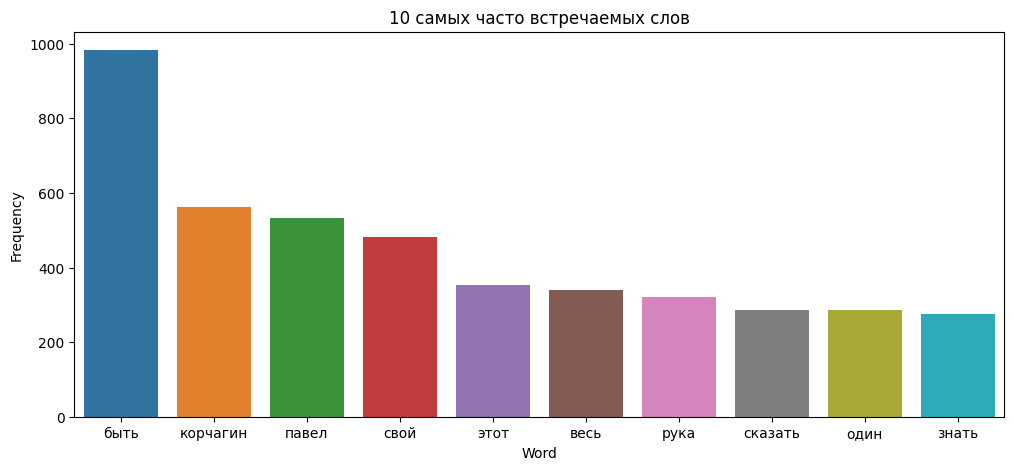

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.barplot(x="Word", y="Frequency", data=common_words)
plt.title("10 самых часто встречаемых слов")